# Detecção de Pneumonia atraves de Raio-X
## Motivação
###### "A Sociedade Brasileira de Pneumologia NÃO permite identificar pneumonia apenas na clinica. É necessário o exame de raio-x"

<img src="img/deep learning with python.jpg" width="300">

### Bibliotecas
###### PILL : manipulação de imagens
###### KERAS : deep learning e data aumentation
### Configuração Computador
###### i5 7ª 8GB

### DataSet
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia<br>
•Imagens <br>
•RGB e GrayScale<br>
•Full HD, HD, 480p
<img src="img/dataset_train.png" width="600">
<img src="img/dataset_test.png" width="600">
###### Data Augmentation
ImageDataGenerator (Keras)

### Mediante a diferança no tamanho das imagens, tornasse necessário definir um tamanho padrão
Reflete no consumo da memória principal RAM/GPU

In [1]:
IMG_SIZE = 200

### Importações

In [2]:
#Manipulação de dados
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Keras
import keras
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
#To get the name of the images in a list
import glob
from random import shuffle
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# Exemplo de dado

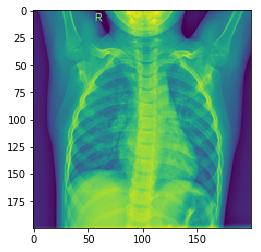

In [3]:
imagem = Image.open("/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
imagem = imagem.convert('L')#Convert Image to Gray scale
imagem = imagem.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
imagem2 = np.array(imagem)
imagem = np.array([imagem2]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)#não sei pq, so sei que tem que ser assim
plt.imshow(imagem2)

# Carregar Dados

In [4]:
#gets train, validation and test data
def load_train_data():
    train_normal_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/*.jpeg")
    train_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg")
    train_data = []
    #label 0 = normal
    #label 1 = pneumonia
    label = 1
    for img in train_normal_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), 0]) #normal
        
    for img in train_pneumonia_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), 1]) #pneumonia
    shuffle(train_data)
    return train_data


def load_validation_data():
    validation_normal_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/val/NORMAL/*.jpeg")
    validation_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/val/PNEUMONIA/*.jpeg")
    validation_data = []
    #label 0 = normal
    #label 1 = pneumonia
    label = 1
    for img in validation_normal_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        validation_data.append([np.array(img), 0]) #normal
        
    for img in validation_pneumonia_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        validation_data.append([np.array(img), 1]) #pneumonia
    shuffle(validation_data)
    return validation_data

def load_test_data():
    test_normal_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/test/NORMAL/*.jpeg")
    test_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/test/PNEUMONIA/*.jpeg")

    test_data = []
    #label 0 = normal
    #label 1 = pneumonia
    label = 1
    for img in test_normal_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), 0]) #normal
        
    for img in test_pneumonia_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), 1]) #pneumonia
    shuffle(test_data)
    return test_data



In [5]:
train_data = load_train_data()

In [6]:
test_data = load_test_data()

### Separete classes from the features(image)

In [7]:
train_images = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array([i[1] for i in train_data])

test_images = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array([i[1] for i in test_data])


# Redes Neurais Convolucionais

## Camadas: Denso VS Convolucionais:
	Denso: Achar padroes globais
	Conv : Encontrar padrões locais na imagem
## Compilação
	Optimizer: <https://keras.io/optimizers/>
	loss -> model will try to minimize: <https://keras.io/losses/>
        loss='binary_crossentropy' for binary decision
	metrics() -> For any classification problem you will want to set this to metrics=['accuracy']
## Função de ativação
	A mais indicada para redes Convolucionais é a RELU
## Camadas
    Dropout: Evit overfiting
    Conv2D: Create N filter on image based in the tuple(Kernel)
    Flatten: Unific a lot of filter in a paralel linear output. you wil lost the image format
    SpatialDropout2D: If adjacent pixels within feature maps are strongly correlated (as is normally the case in early convolution layers)
    SeparableConv2D ?
    MAXPOOLING: Simplify the information, just the max value in kernel will be outputed
        https://computersciencewiki.org/index.php/File:MaxpoolSample2.png
    BatchNormalization: to improve the training speed by normalizing the features from input and hidden layers

# Criação do Modelo
## Ultima camada pode ser softmax ou sigmoid
### Exemplo com sigmoid

In [8]:
modelo_original = Sequential()

modelo_original.add(Conv2D(10, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
modelo_original.add(AveragePooling2D(pool_size=(2, 2)))

modelo_original.add(Conv2D(10, (3, 3), activation='relu'))
modelo_original.add(AveragePooling2D(pool_size=(2, 2)))

modelo_original.add(Conv2D(10, (3, 3), activation='relu'))

modelo_original.add(Flatten())
modelo_original.add(Dropout(0.2))
modelo_original.add(Dense(128, activation='relu'))
modelo_original.add(Dropout(0.5))
modelo_original.add(Dense(50, activation='relu'))

modelo_original.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
modelo_aumentado = Sequential()

modelo_aumentado.add(Conv2D(12, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
modelo_aumentado.add(AveragePooling2D(pool_size=(2, 2)))

modelo_aumentado.add(Conv2D(10, (3, 3), activation='relu'))
modelo_aumentado.add(AveragePooling2D(pool_size=(2, 2)))

modelo_aumentado.add(Conv2D(10, (3, 3), activation='relu'))

modelo_aumentado.add(Flatten())
modelo_aumentado.add(Dropout(0.2))
modelo_aumentado.add(Dense(128, activation='relu'))
modelo_aumentado.add(Dropout(0.5))
modelo_aumentado.add(Dense(50, activation='relu'))

modelo_aumentado.add(Dense(1, activation='sigmoid'))


### Exemplo com softmax

In [10]:

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation = 'softmax'))



## Definições

In [11]:
modelo_original.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 10)      100       
_________________________________________________________________
average_pooling2d_1 (Average (None, 99, 99, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 10)        910       
_________________________________________________________________
average_pooling2d_2 (Average (None, 48, 48, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 10)        910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21160)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21160)             0         
__________

## Compilação

In [12]:
modelo_original.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
modelo_aumentado.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# Treinando o modelo (Sem data aumentation)

In [13]:
historia_original = modelo_original.fit(train_images, train_labels, batch_size=50, epochs=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
5216/5216 [==============================] - 64s 12ms/step - loss: 4.1217 - acc: 0.7375


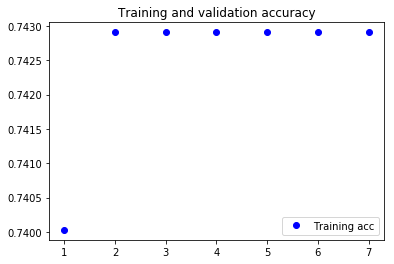

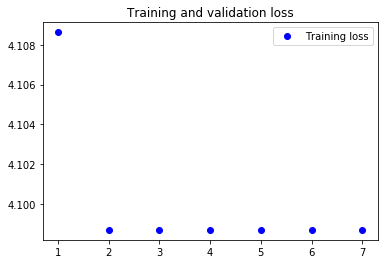

In [20]:
import matplotlib.pyplot as plt
acc = historia_original.history['acc']
loss = historia_original.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Avaliando modelo

In [32]:
loss, acc = modelo_original.evaluate(test_images, test_labels, verbose = 0)
print("Accuracy on test set: ", acc*100)

Accuracy on test set:  62.5


In [50]:
pred_images = modelo_original.predict(test_images, verbose=0)

pred_images = np.argmax(pred_images, axis=-1)

In [51]:
print(test_labels.shape)
print(pred_images.shape)

(624,)
(624,)


[[234   0]
 [390   0]]


<Figure size 432x288 with 0 Axes>

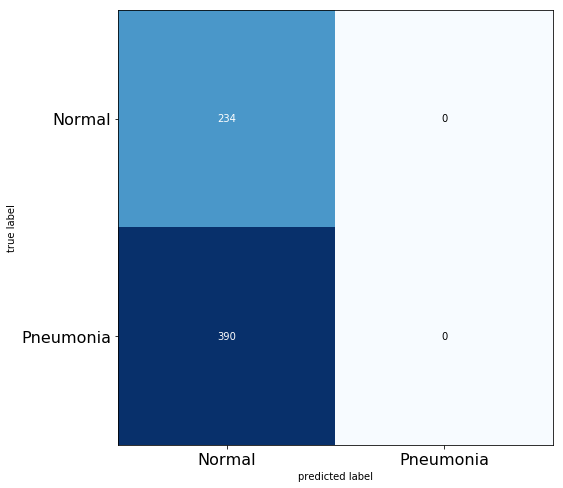

In [52]:
cm  = confusion_matrix(test_labels, pred_images)
print(cm)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [47]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()
print(tn)
print(fp)
print(fn)
print(tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))



234
0
390
0
Recall of the model is 0.00
Precision of the model is nan


/home/franklyn/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


## Keras NÃO é uma Caixa Preta

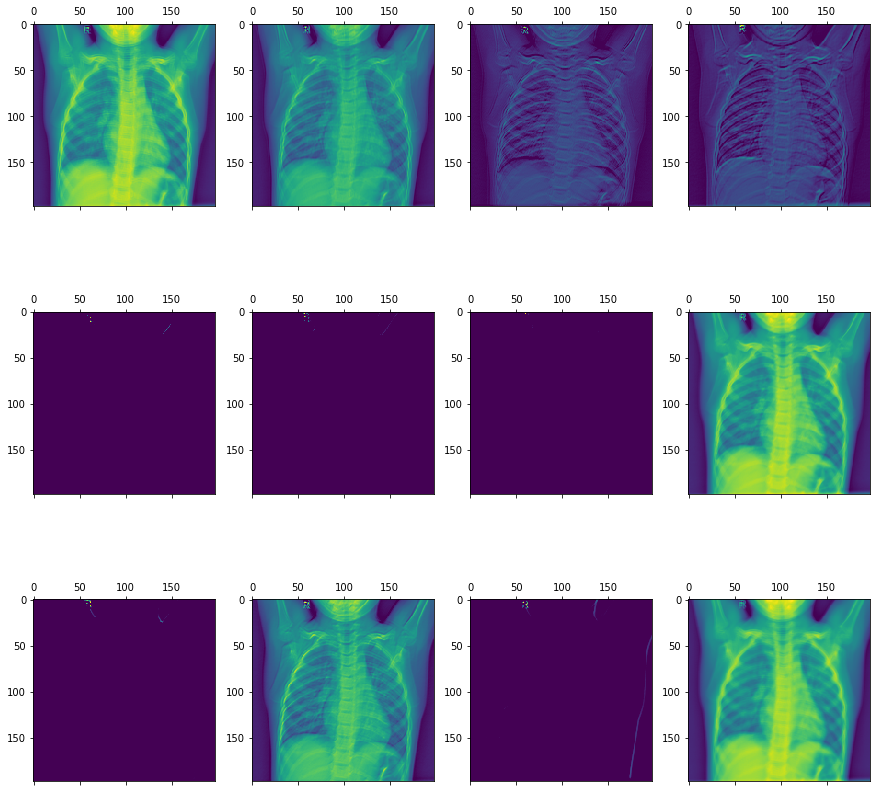

In [25]:
imagem = Image.open("/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
imagem = imagem.convert('L')#Convert Image to Gray scale
imagem = imagem.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
imagem2 = np.array(imagem)
imagem = np.array([imagem2]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)#não sei pq, so sei que tem que ser assim

layer_outputs = [layer.output for layer in modelo_aumentado.layers[:8]]
activation_model = models.Model(inputs=modelo_aumentado.input, outputs=layer_outputs)
activations = activation_model.predict([imagem])
first_layer_activation = activations[0]

fig = plt.figure()##
fig.set_figheight(15)##
fig.set_figwidth(15)##

for i in range(12):
    ax1 = fig.add_subplot(3,4,i+1)##
    ax1.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    #.imshow(first_layer_activation[0, :, :, i], cmap='viridis')##
    ##plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
plt.show()

# Data aumentation
#### Exemplo

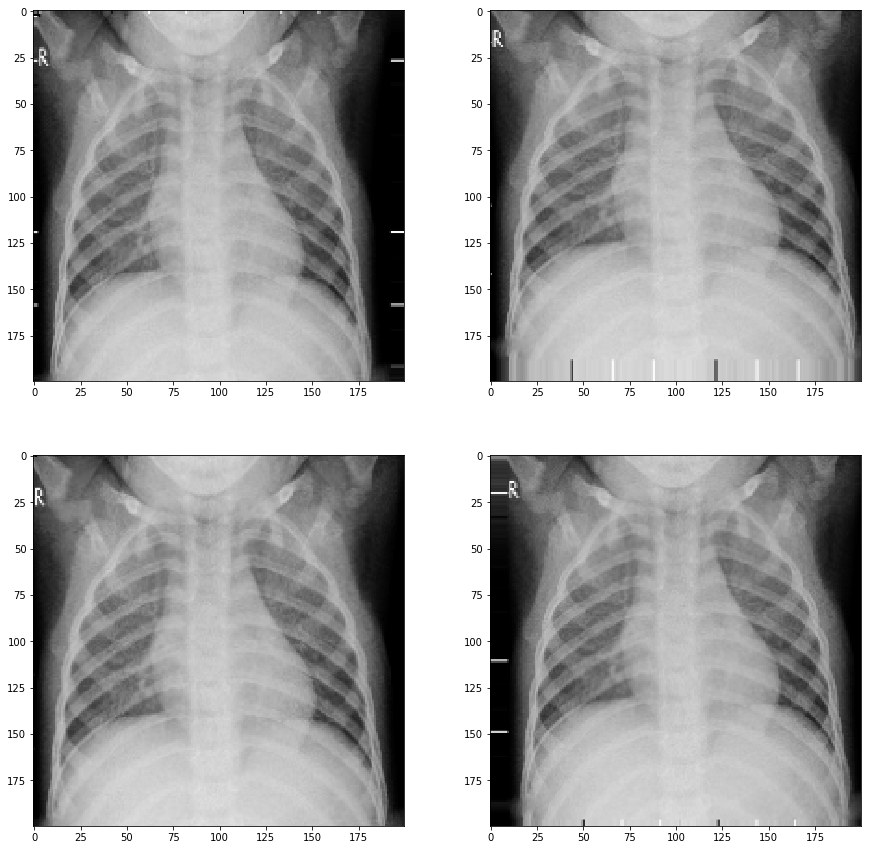

In [26]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='nearest')

from keras.preprocessing import image

img = image.load_img(
    "/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1360-0001.jpeg"
    , target_size=(IMG_SIZE, IMG_SIZE))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0

fig = plt.figure(i)##
fig.set_figheight(15)##
fig.set_figwidth(15)##

for batch in datagen.flow(x, batch_size=1):
    #plt.figure(i)
    
    ax1 = fig.add_subplot(2,2,i+1)##
    ax1.imshow(image.array_to_img(batch[0]))##
    
    ##imgplot = plt.imshow(image.array_to_img(batch[0]))
    
    i+=1
    if i%4==0:
        break
plt.show()

In [27]:
Bsize = 100

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory("/home/franklyn/Downloads/chest_xray/chest_xray/train/",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=Bsize,
                        class_mode='binary',
                        color_mode = "grayscale")

validation_generator = test_datagen.flow_from_directory("/home/franklyn/Downloads/chest_xray/chest_xray/val",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=Bsize,
                        class_mode='binary',
                        color_mode = "grayscale")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [28]:
history = modelo_aumentado.fit_generator(
    train_generator,
    steps_per_epoch=4000/Bsize,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=1)

Epoch 1/2
40/40 [==============================] - 89s 2s/step - loss: 0.4782 - acc: 0.7692 - val_loss: 0.6662 - val_acc: 0.7500
Epoch 2/2
40/40 [==============================] - 82s 2s/step - loss: 0.2857 - acc: 0.8806 - val_loss: 0.6583 - val_acc: 0.8125


# Verificando resultados

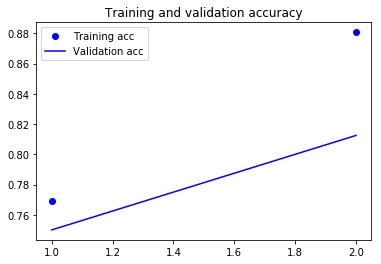

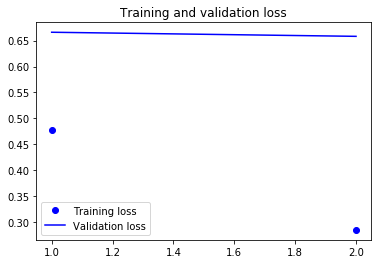

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Avaliando o modelo

In [38]:
loss, acc = modelo_aumentado.evaluate(test_images, test_labels, verbose = 0)
print(acc * 100)

63.46153846153846
